In [30]:
%pylab nbagg
from tvb.simulator.lab import *
import os.path
from matplotlib import colors, cm
import time
import scipy.signal as sig

import numpy as np
import pandas as pd
import scipy.io

# downloaded library for peak detection in z time series
import peakdetect
from runmainsim import *
from visualize import *

%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
def normalizetime(ts):
    print "time series shape is: ", ts.shape
    
    tsrange = (np.max(ts, 1) - np.min(ts, 1))
    ts = ts/tsrange[:,np.newaxis]
    return ts

# 1. Visualize Epileptor and SEEG From TVB Simulations

Here, we want to visualize the epileptor and seeg ts first to ensure that they are realistic.

In [35]:
eznum=1
pznum=0

patient = 'id001_ac'
outputdir = os.path.join('/Users/adam2392/Documents/pydata/tvb_forwardsim/', patient)
if not os.path.exists(outputdir):
    os.mkdir(outputdir)
filename = os.path.join(outputdir, patient+'_sim_nez'+str(eznum)+\
                                '_npz'+str(pznum)+'.npz')

data = np.load(filename)

# extract data and metadata from simulation
epits = data['epits']
zts = data['zts']
times = data['times']
seegts = data['seegts']

metadata = data['metadata'].item()

print filename
print data.keys()
print "Meta data contains: ", metadata.keys()
print metadata['pzindices']

/Users/adam2392/Documents/pydata/tvb_forwardsim/id001_ac/id001_ac_sim_nez1_npz0.npz
['metadata', 'zts', 'seegts', 'epits', 'times']
Meta data contains:  ['patient', 'pz', 'onsettimes', 'seeg_xyz', 'x0ez', 'regions_centers', 'regions', 'seeg_contacts', 'offsettimes', 'x0pz', 'ez', 'pzindices', 'x0norm', 'ezindices']
[]


ezreion is:  ['ctx-lh-bankssts']
pzregion is:  []
x0 values are (ez, pz, norm):  -1.5 2.05 -2.5
time series shape is:  (84, 60000)


<IPython.core.display.Javascript object>


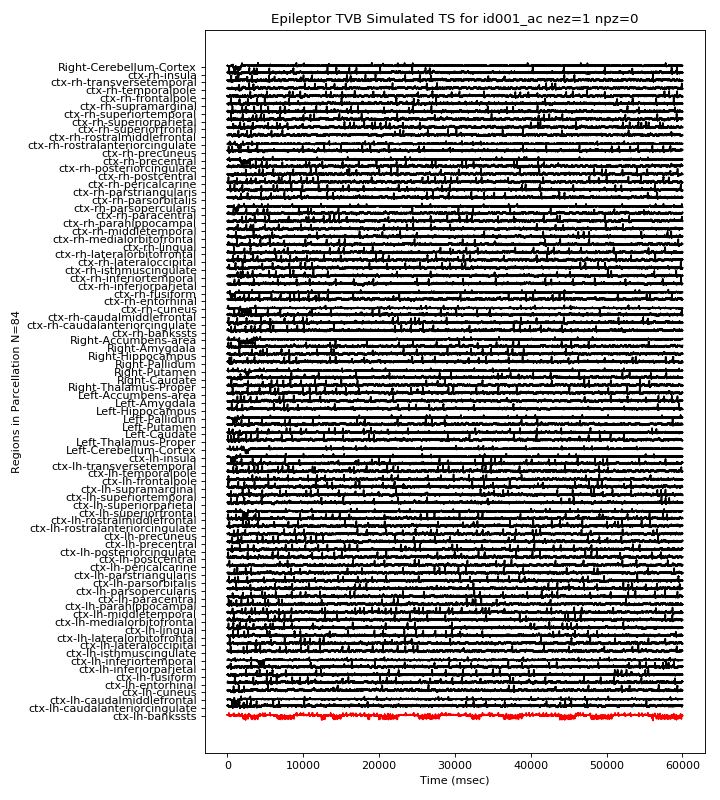

ezreion is:  ['ctx-lh-bankssts']
pzregion is:  []
x0 values are (ez, pz, norm):  -1.5 2.05 -2.5
time series shape is:  (84, 60000)


<IPython.core.display.Javascript object>


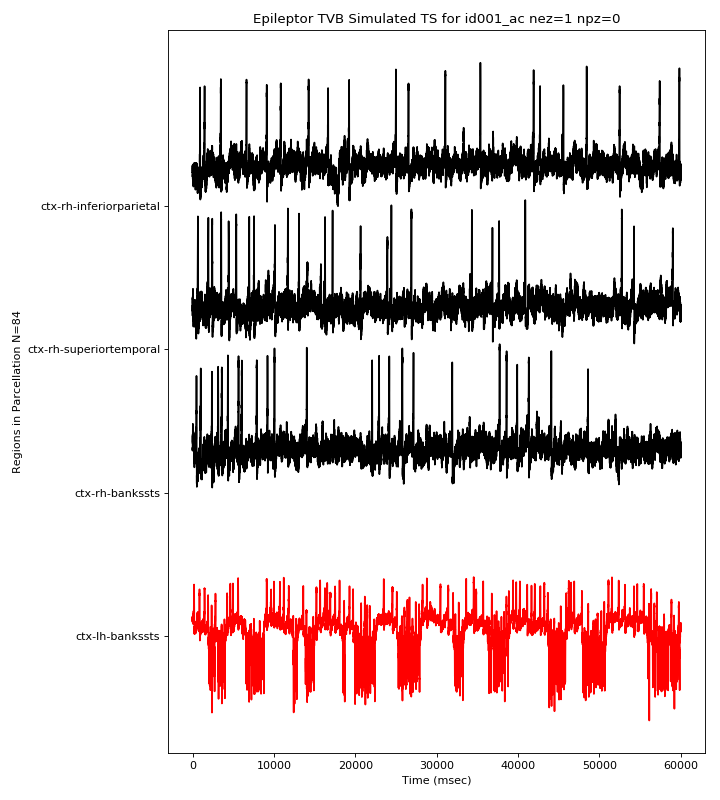

In [36]:
# get shapes of epits
numregions, numsamps = epits.shape
numchans, numsamps = seegts.shape

timewindowbegin = 0
timewindowend = numsamps

############################### PLOTTING OF EPILEPTOR TS ###############################
epifig = plotepileptorts(epits, times, metadata, patient, plotsubset=False)
epifigsubset = plotepileptorts(epits, times, metadata, patient, plotsubset=True)

# 2. Visualize SEEG From TVB Sim

Here, we want to visualize the SEEG ts after simulation. We will need to apply a HP filter of 0.01 Hz, or say even 1 Hz, to get rid of the 'DC shift'. 

Here, want to make sure these are realistic of the EZ.

To Do:
1. Plot on a sideplot the distance of each channel from the closest EZ in Euclidean distance.